In [3]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
# import timedelta
from datetime import timedelta

In [4]:
df_cut_final = pd.read_csv('../../data/tidy/paired_data/final_data_for_analysis_iob_check.csv')
cgm_ins = pd.read_csv('../../data/tidy/paired_data/merged_cgm_iob_data.csv')  # Save if needed


In [5]:
df_weight = pd.read_csv('../../../hypo-predict/data/tidy_data/demographics_df.csv')
df_weight.drop_duplicates(subset=['ID'], keep='first', inplace=True)
df_cut_final = df_cut_final.merge(df_weight[['ID', 'weight']], on='ID', how='inner')
df_cut_final['iob_kg'] = df_cut_final['IOB'] / df_cut_final['weight']

## Hypo

In [6]:
cgm = cgm_ins[['ID', 'time', 'glc']]

In [7]:
cgm

,ID,time,glc
0,helm_1719,2020-09-29 00:37:00,7.44
1,helm_1719,2020-09-29 00:42:00,7.44
2,helm_1719,2020-09-29 00:47:00,7.44
3,helm_1719,2020-09-29 00:52:00,7.33
4,helm_1719,2020-09-29 00:57:00,7.06
...,...,...,...
4393121,helm_498,2020-06-07 22:56:00,9.78
4393122,helm_498,2020-06-07 23:01:00,9.56
4393123,helm_498,2020-06-07 23:06:00,9.50
4393124,helm_498,2020-06-07 23:11:00,9.39


In [8]:
df_hypos = df_cut_final[['ID', 'start_datetime', 'duration']]

In [9]:
df_cut_final

,bout_id,ID,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,...,glc_quadratic,age_quadratic,bmi_quadratic,iob_cubed,start_roc_cubed,cv_cubed,glc_cubed,age_cubed,bmi_cubed,weight
0,0,helm_1,2020-05-14 09:57:57,30.0,0.0,Study Video,2020-05-14 10:27:57,5.0,14.0,3.0,...,171.8721,441,553.612881,0.000000,7.414875e-06,2.202771,2253.243231,9261,13025.946170,74.389149
1,1,helm_1,2020-05-21 21:29:02,30.0,0.0,Study Video,2020-05-21 21:59:02,5.0,21.0,3.0,...,134.7921,441,553.612881,0.000000,1.447031e-04,599.536541,1564.936281,9261,13025.946170,74.389149
2,2,helm_1,2020-05-30 17:29:05,28.0,1.0,Jogging/Running (Indoor or Outdoor),2020-05-30 17:57:05,5.0,30.0,5.0,...,173.4489,441,553.612881,2.483227,-5.120000e-07,386.320691,2284.322013,9261,13025.946170,74.389149
3,3,helm_4,2020-01-11 07:23:10,20.0,1.0,Biking (Indoor or Outdoor),2020-01-11 07:43:10,1.0,11.0,5.0,...,113.8489,1024,706.413999,7.041088,-7.414875e-06,9.252967,1214.767763,32768,18775.389095,81.646627
4,4,helm_4,2020-01-11 14:25:38,20.0,1.0,Biking (Indoor or Outdoor),2020-01-11 14:45:38,1.0,11.0,5.0,...,133.6336,1024,706.413999,0.000000,-4.492125e-06,10.366648,1544.804416,32768,18775.389095,81.646627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,1585,dexip_531,2021-11-15 23:39:00,20.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,102.2121,169,1500.228430,25.101104,-1.331000e-06,52.703454,1033.364331,2197,58108.021285,108.862169
3088,1586,dexip_535,2021-10-11 08:15:00,15.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,139.9489,144,389.570834,16.014759,2.269810e-04,3868.205952,1655.595487,1728,7689.173353,52.163123
3089,1587,dexip_535,2021-10-10 23:45:00,20.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,180.6336,144,389.570834,0.555412,4.492125e-06,539.037373,2427.715584,1728,7689.173353,52.163123
3090,1588,dexip_540,2021-05-13 09:25:00,10.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,156.2500,256,557.981008,0.000000,-4.218750e-04,243.609401,1953.125000,4096,13180.416244,83.460996


In [10]:
df_hypos['start_datetime'] = pd.to_datetime(df_hypos['start_datetime'])
df_hypos['finish_datetime'] = df_hypos.apply(lambda row: row['start_datetime'] + pd.Timedelta(minutes=row['duration']+20), axis=1)

/tmp/ipykernel_1966347/3238399528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypos['start_datetime'] = pd.to_datetime(df_hypos['start_datetime'])
/tmp/ipykernel_1966347/3238399528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypos['finish_datetime'] = df_hypos.apply(lambda row: row['start_datetime'] + pd.Timedelta(minutes=row['duration']+20), axis=1)


In [11]:

cgm['time'] = pd.to_datetime(cgm['time'])

# Initialize a column to store if hypo (<3.9) was detected
df_hypos['hypo'] = False

# Loop through each bout to check for glucose readings < 3.9
for i, bout in df_hypos.iterrows():
    bout_id = bout['ID']
    start_time = bout['start_datetime']
    end_time = bout['finish_datetime']
    
    # Filter glucose data for the same ID and time range
    glc_in_bout = cgm[(cgm['ID'] == bout_id) & 
                         (cgm['time'] >= start_time) & 
                         (cgm['time'] <= end_time)]
    
    # Check if any glucose value is below 3.9
    if (glc_in_bout['glc'] < 3.9).any():
        df_hypos.at[i, 'hypo'] = True  # Set hypo to True if any glc < 3.9


/tmp/ipykernel_1966347/1355326322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cgm['time'] = pd.to_datetime(cgm['time'])
/tmp/ipykernel_1966347/1355326322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hypos['hypo'] = False


KeyboardInterrupt: 

In [ ]:
df_hypos.to_csv('../../data/tidy/paired_data/hypo_data.csv', index=False)

## Model

In [12]:
df_hypos = pd.read_csv('../../data/tidy/paired_data/hypo_data.csv')

In [13]:
df_hypos

,ID,start_datetime,duration,finish_datetime,hypo
0,helm_1,2020-05-14 09:57:57,30.0,2020-05-14 10:47:57,False
1,helm_1,2020-05-21 21:29:02,30.0,2020-05-21 22:19:02,False
2,helm_1,2020-05-30 17:29:05,28.0,2020-05-30 18:17:05,False
3,helm_4,2020-01-11 07:23:10,20.0,2020-01-11 08:03:10,False
4,helm_4,2020-01-11 14:25:38,20.0,2020-01-11 15:05:38,False
...,...,...,...,...,...
3087,dexip_531,2021-11-15 23:39:00,20.0,2021-11-16 00:19:00,False
3088,dexip_535,2021-10-11 08:15:00,15.0,2021-10-11 08:50:00,False
3089,dexip_535,2021-10-10 23:45:00,20.0,2021-10-11 00:25:00,False
3090,dexip_540,2021-05-13 09:25:00,10.0,2021-05-13 09:55:00,False


In [14]:
df_cut_final['hypo'] = df_hypos['hypo']

In [15]:
df_cut_final['study'] = df_cut_final['ID'].str.split('_').str[0]

In [16]:
df_cut_final.groupby(['study', 'exercise']).hypo.value_counts()

study  exercise  hypo 
dexip  0         False     253
       1         False     253
helm   0         False    1292
                 True        1
       1         False    1271
                 True       22
Name: count, dtype: int64

In [19]:
100*22/1546

1.423027166882277

In [18]:
100*1/1546

0.0646830530401035

In [ ]:
df_cut_final

,bout_id,ID,start_datetime,duration,intensity,type_of_exercise,finish_datetime,month,day,day_of_week,...,age_quadratic,bmi_quadratic,iob_cubed,start_roc_cubed,cv_cubed,glc_cubed,age_cubed,bmi_cubed,weight,study
0,0,helm_1,2020-05-14 09:57:57,30.0,0.0,Study Video,2020-05-14 10:27:57,5.0,14.0,3.0,...,441,553.612881,0.000000,7.414875e-06,2.202771,2253.243231,9261,13025.946170,74.389149,helm
1,1,helm_1,2020-05-21 21:29:02,30.0,0.0,Study Video,2020-05-21 21:59:02,5.0,21.0,3.0,...,441,553.612881,0.000000,1.447031e-04,599.536541,1564.936281,9261,13025.946170,74.389149,helm
2,2,helm_1,2020-05-30 17:29:05,28.0,1.0,Jogging/Running (Indoor or Outdoor),2020-05-30 17:57:05,5.0,30.0,5.0,...,441,553.612881,2.483227,-5.120000e-07,386.320691,2284.322013,9261,13025.946170,74.389149,helm
3,3,helm_4,2020-01-11 07:23:10,20.0,1.0,Biking (Indoor or Outdoor),2020-01-11 07:43:10,1.0,11.0,5.0,...,1024,706.413999,7.041088,-7.414875e-06,9.252967,1214.767763,32768,18775.389095,81.646627,helm
4,4,helm_4,2020-01-11 14:25:38,20.0,1.0,Biking (Indoor or Outdoor),2020-01-11 14:45:38,1.0,11.0,5.0,...,1024,706.413999,0.000000,-4.492125e-06,10.366648,1544.804416,32768,18775.389095,81.646627,helm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,1585,dexip_531,2021-11-15 23:39:00,20.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,169,1500.228430,25.101104,-1.331000e-06,52.703454,1033.364331,2197,58108.021285,108.862169,dexip
3088,1586,dexip_535,2021-10-11 08:15:00,15.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,144,389.570834,16.014759,2.269810e-04,3868.205952,1655.595487,1728,7689.173353,52.163123,dexip
3089,1587,dexip_535,2021-10-10 23:45:00,20.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,144,389.570834,0.555412,4.492125e-06,539.037373,2427.715584,1728,7689.173353,52.163123,dexip
3090,1588,dexip_540,2021-05-13 09:25:00,10.0,-1.0,NaN,NaN,NaN,NaN,NaN,...,256,557.981008,0.000000,-4.218750e-04,243.609401,1953.125000,4096,13180.416244,83.460996,dexip


In [21]:
df_cut_final['hypo'] = df_cut_final['hypo'].astype(int)

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'glc_change' is your dependent variable and 'flag' is your main fixed effect
model = smf.mixedlm(
    "hypo ~  exercise + duration + glc+ iob_kg + (1+bout_id)",# + exercise:cv + exercise:age_bin  + exercise:bmi_bin+"
   # "exercise:IOB + hba1c ", #  +C(insulin_modality)+ age + bmi  time_3_9_to_10 +hour_of_day+ time_above_10 + hbgi + avg_glucose + + exercise:age + exercise:bmi
    data=df_cut_final,
    groups="ID",  # Indidf_cut_final_demovidual-level random effect
)
result = model.fit(reml=True)


/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/statsmodels/base/mode

In [31]:
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: hypo     
No. Observations: 3092    Method:             REML     
No. Groups:       482     Scale:              0.0066   
Min. group size:  2       Log-Likelihood:     3174.9241
Max. group size:  34      Converged:          No       
Mean group size:  6.4                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.008    0.013  0.635 0.525 -0.017  0.033
exercise      0.014    0.003  4.743 0.000  0.008  0.020
duration      0.001    0.000  1.991 0.046  0.000  0.001
glc          -0.001    0.001 -1.608 0.108 -0.003  0.000
iob_kg        0.086    0.061  1.414 0.157 -0.033  0.205
bout_id      -0.000    0.000 -0.981 0.326 -0.000  0.000
ID Var        0.001    0.004                           



In [ ]:
df_cut_final[['duration', 'glc', 'start_roc', 'IOB', 'cv', 'hba1c', 'bmi', 'age', 'age_quadratic', 'glc_quadratic']] = df_cut_final[['duration','glc', 'start_roc', 'iob_kg', 'cv', 'hba1c', 'bmi', 'age', 'age_quadratic', 'glc_quadratic']].apply(lambda x: (x - x.mean()), axis=0)

In [42]:
from pymer4.models import Lmer

# Fit logistic mixed-effects model
model = Lmer(
    "hypo ~ exercise + glc+ duration + (1 | ID)",# + exercise:cv + exercise:age_bin + exercise:bmi_bin + exercise:IOB + hba1c + (1 + exercise | ID) + (1 | bout_id)",
    data=df_cut_final,
    family="binomial"
)

result = model.fit()
print(result)

Model failed to converge with max|grad| = 0.0323658 (tol = 0.002, component 1) 

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: hypo~exercise+glc+duration+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3092	 Groups: {'ID': 482.0}

Log-likelihood: -92.329 	 AIC: 194.658

Random effects:

           Name     Var    Std
ID  (Intercept)  67.027  8.187

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE      OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)   -11.521 -11.525  -11.517  0.002   0.000      0.000       0.000   
exercise        4.484   4.480    4.488  0.002  88.586     88.207      88.967   
glc            -0.574  -0.579   -0.570  0.002   0.563      0.561       0.565   
duration        0.151   0.146    0.155  0.002   1.163      1.158       1.168   

              Prob  Prob_2.5_ci  Prob_97.5_ci    Z-stat  P-val  Sig  
(Intercept)  0.000        0.000         0.000 -5271.092    0.0  ***  
exerc

/home/cat/Desktop/projects/glucoseLo/.venv/lib/python3.10/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


In [ ]:
result

,Estimate,2.5_ci,97.5_ci,SE,OR,OR_2.5_ci,OR_97.5_ci,Prob,Prob_2.5_ci,Prob_97.5_ci,Z-stat,P-val,Sig
(Intercept),-15.147,-18.918,-11.375,1.924,0.000,0.000,0.000,0.000,0.000,0.000,-7.871,0.000,***
exercise,4.451,2.093,6.809,1.203,85.723,8.111,905.940,0.988,0.890,0.999,3.700,0.000,***
glc,-0.550,-1.211,0.110,0.337,0.577,0.298,1.116,0.366,0.230,0.528,-1.633,0.102,
duration,0.150,0.017,0.284,0.068,1.162,1.017,1.328,0.537,0.504,0.570,2.203,0.028,*
age,0.005,-0.076,0.085,0.041,1.005,0.927,1.089,0.501,0.481,0.521,0.112,0.911,
hba1c,-0.082,-0.247,0.083,0.084,0.921,0.781,1.086,0.480,0.439,0.521,-0.973,0.330,


In [ ]:
import pandas as pd

# Example data (replace with your model's actual results)
data = {
    'Variable': ['Intercept', 'Exercise', 'Starting Glucose', 'IOB'],
    'Estimate': [-5.226, 2.877, -0.610, 0.194],
    'Lower CI': [-5.255, 2.849, -0.634, 0.165],
    'Upper CI': [-5.197, 2.904, -0.586, 0.222],
    'OR': [0.005, 17.756, 0.543, 1.214],  # Odds Ratios
}

df = pd.DataFrame(data)


<Axes: xlabel='Log Odds'>

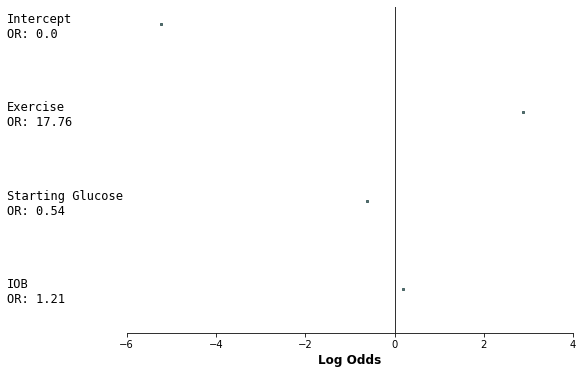

In [ ]:
from forestplot import forestplot

# Prepare the data for the forest plot
df['Label'] = df['Variable'] + "\nOR: " + df['OR'].round(2).astype(str)

# Create the forest plot
forestplot(
    dataframe = df[['Label', 'Estimate', 'Lower CI', 'Upper CI']],  # Coefficients and CIs

    estimate='Estimate',  # Point estimates
    conf_int=['Lower CI', 'Upper CI'],  # Confidence intervals
    varlabel='Label',  # Variable labels
    figsize=(8, 6),  # Customize figure size
    xlabel="Log Odds",  # Label for x-axis
    xticks=[-6, -4, -2, 0, 2, 4],  # Adjust xticks based on log-odds
    markersize=8,  # Size of the points
    line_width=1.5  # Width of the CI lines
)
